<a href="https://colab.research.google.com/github/yaqianhe/GIA/blob/main/Lecture09_Timeseries_I%26II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Lecture 9: Time Series Data in Python: Pandas I&II
##Yaqian He
##Department of Geography
##University of Central Arkansas


## Time Series Data in Python
Time series data is a collection of observations obtained through repeated measurements over **time**. Plot the points on a graph, and one of your axes would always be time.

![picture](https://drive.google.com/uc?export=view&id=1J3udYsvCyQP1HZbcz5CbCSSS0nUChiNL)

(Reference: https://towardsdatascience.com/time-series-analysis-1-9f4360f43110)



Often by default, date information is loaded in Python as string (i.e., a set of characters), rather than something that has an order in time.
The Python datetime object will make working with and plotting time series data easier. **You can convert pandas dataframe columns containing dates and times as string into datetime objects**. 

This section will introduce how to use, manipulate, plot, and analyze time series data.

Starting from this class, you will learn how to use different Python libraries/ Packages to maniuplate data. Some libraries are required for each script, for instance. If you want to visulize your results, you may always need the matplotlib library.

In today's class, we will use the following libraries:
- **Pandas**: the main library we will use to minupulate time-series data. 
- **matplotlib** and **seaborn**: visulization libraries. Seaborn is based on matplotlib and focuses on statistical ploting.
- **os**: the module that can be used to apply functions to create or delete folders.
- **earthpy**: a library for working with Earth Data, including vector and raster data. The data used in this class are from the sample data in earthpy.



In [ ]:
# Import necessary packages 
from matplotlib.axes._axes import _log as matplotlib_axes_logger #import matplotlib.axes._axes._log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
!pip install earthpy #(Note, if the package cannot be imported, it will
# need to be installed firstly. In Anaconda, the package can be installed as:
# conda install package name or pip install package name,such as
# conda install matplotlib)
#conda install earthpy)
import earthpy as et


# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Dealing with error thrown by one of the plots
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')


# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

     |████████████████████████████████| 1.4 MB 13.3 MB/s 
     |████████████████████████████████| 1.0 MB 41.7 MB/s 
     |████████████████████████████████| 19.3 MB 1.6 MB/s 
     |████████████████████████████████| 16.7 MB 431 kB/s 
     |████████████████████████████████| 6.3 MB 50.6 MB/s 


In [ ]:
import numpy as np

In [ ]:
# Download the data
data = et.data.get_data('colorado-flood') #The data are automatically downloaded to a new directory in the data directory under earth-analytics
# Set working directory: ~/earth-analytics/data
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', "data"))

Extracted output to /root/earth-analytics/data/colorado-flood/.


In [ ]:
# Define relative path to the data
file_path = os.path.join("colorado-flood",
                         "precipitation",
                         "805325-precip-daily-2003-2013.csv")
print(file_path)

# Import the file as a pandas dataframe
boulder_precip_2003_2013 = pd.read_csv(file_path)
boulder_precip_2003_2013.head()

colorado-flood/precipitation/805325-precip-daily-2003-2013.csv


,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030101 01:00,0.0,g,
1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030201 01:00,0.0,g,
2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 19:00,0.2,,
3,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 22:00,0.1,,
4,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030203 02:00,0.1,,


## 1. Roughly Plot Data and Clean it
It usually needs to read data document to identify the problem, fix it, and process it. The document for this data can be found in ~/precipitation/PRECIP_HLY_documentation.pdf.

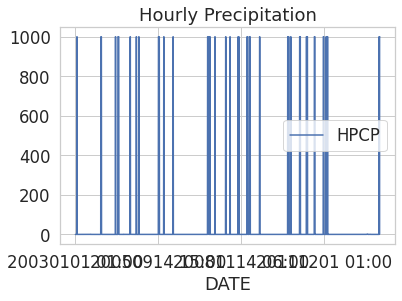

In [ ]:
#Plot the data using the Daly_Precip column (i.e., HPCP)
boulder_precip_2003_2013.plot(x="DATE",
                              y="HPCP",
                              title="Hourly Precipitation")
plt.show()


The data clearly is abnormal. If you read the document, you will find it is due to the missing values, which are assigned to 999.99. You can also use some basic statistical summary to understand your data.

In [ ]:
# Look at the range of values in the data - specifically the HPCP column
boulder_precip_2003_2013["HPCP"].describe()

count    1840.000000
mean       51.192587
std       220.208147
min         0.000000
25%         0.100000
50%         0.100000
75%         0.100000
max       999.990000
Name: HPCP, dtype: float64

In [ ]:
# view the data type
boulder_precip_2003_2013.dtypes

STATION              object
STATION_NAME         object
ELEVATION           float64
LATITUDE            float64
LONGITUDE           float64
DATE                 object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

Now you understand the data a little bit better.

  (1) The data has a value of 999.999 representing a no data value that needs to be removed from the data.
  
  (2) You may have noticed that your x axis date values in the plot look "messy". When you seen an x-axis like this but you know your data are time series, it's most often caused by your datetime data not being read in properly as numeric date times. You will address all of these problems using the following code.

In [ ]:
# Import data using datetime and no data value
boulder_precip_2003_2013 = pd.read_csv(file_path,
                                       # Make sure the dates import in datetime format
                                       parse_dates=['DATE'],
                                       # Set DATE as the index so you can subset data by time period
                                       index_col=['DATE'],
                                       # Mask no data values so they are not plotted / used in analysis
                                       na_values=['999.99'])

# View the data
boulder_precip_2003_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


You may notice the DATE column is bold, representing the DATE column is an index. Assigning an index column is helpful when using timeseries data as it allows you to easily subset your data by time, which you will learn later in this section.
After cleaning the data, view the summary statistics and data types again. 

In [ ]:
# view the summary statistic again
boulder_precip_2003_2013["HPCP"].describe()

count    1746.000000
mean        0.111856
std         0.093222
min         0.000000
25%         0.100000
50%         0.100000
75%         0.100000
max         2.200000
Name: HPCP, dtype: float64

In [ ]:
# view the data type again
boulder_precip_2003_2013.dtypes

STATION              object
STATION_NAME         object
ELEVATION           float64
LATITUDE            float64
LONGITUDE           float64
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

The min and max values for precipitation are more reasonable for hourly precipitation ranging from 0 to 2.2.

Note, once a column is an index, it is no longer a column described in your dataframe, that is the reason that you cannot find DATA when you run **.dtypes**.

You can still access the DATE column as an index column using **.index** (e.g., boulder_precip_2003_2013.index).

You can also reset the index if you want it to turn it back into a normal column using **.reset_index()**(e.g.,boulder_precip_2003_2013.reset_index()).

Plot the data again. **Because the data has an index column, it will automatically select that column to plot on the x-axis. You then only need to specify the y-axis column.**


In [ ]:
boulder_precip_2003_2013.index

DatetimeIndex(['2003-01-01 01:00:00', '2003-02-01 01:00:00',
               '2003-02-02 19:00:00', '2003-02-02 22:00:00',
               '2003-02-03 02:00:00', '2003-02-05 02:00:00',
               '2003-02-05 08:00:00', '2003-02-06 00:00:00',
               '2003-02-07 12:00:00', '2003-02-10 13:00:00',
               ...
               '2013-12-01 01:00:00', '2013-12-03 20:00:00',
               '2013-12-04 03:00:00', '2013-12-04 06:00:00',
               '2013-12-04 09:00:00', '2013-12-22 01:00:00',
               '2013-12-23 00:00:00', '2013-12-23 02:00:00',
               '2013-12-29 01:00:00', '2013-12-31 00:00:00'],
              dtype='datetime64[ns]', name='DATE', length=1840, freq=None)

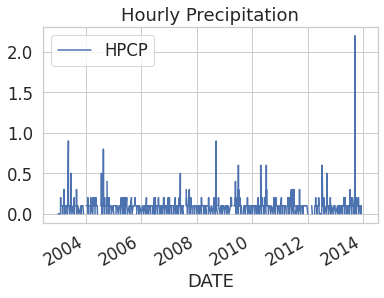

In [ ]:
boulder_precip_2003_2013.plot(y="HPCP",
                              title="Hourly Precipitation")
plt.show()

Now the plot is much better!

## 2. Temporally Subset Data Using Pandas Dataframes

Previously, you have learned how to decide which column contains time stamps and how to set the date column to be the index of the dataframe. In this section,  you will learn how to use the datetime index to subset data from a pandas dataframe.

Sometimes a dataset contains a much larger timeframe than you need for your analysis or plotting, which will take much time to compute, especially when the dataset is large. It can be helpful to select or subset the data to the needed timeframe.

In [ ]:
# view index values of dataframe
boulder_precip_2003_2013.index

DatetimeIndex(['2003-01-01 01:00:00', '2003-02-01 01:00:00',
               '2003-02-02 19:00:00', '2003-02-02 22:00:00',
               '2003-02-03 02:00:00', '2003-02-05 02:00:00',
               '2003-02-05 08:00:00', '2003-02-06 00:00:00',
               '2003-02-07 12:00:00', '2003-02-10 13:00:00',
               ...
               '2013-12-01 01:00:00', '2013-12-03 20:00:00',
               '2013-12-04 03:00:00', '2013-12-04 06:00:00',
               '2013-12-04 09:00:00', '2013-12-22 01:00:00',
               '2013-12-23 00:00:00', '2013-12-23 02:00:00',
               '2013-12-29 01:00:00', '2013-12-31 00:00:00'],
              dtype='datetime64[ns]', name='DATE', length=1840, freq=None)

<h3>2.1 Subset Pandas Dataframe By Year</h3>

You can easily subste your data using the syntax: yourdata["index_date"].

Note that the datetime index value is accessed using **quotation** marks " " similar to how you query for strings or lists.

In [ ]:
# Select 2013 data - view first few records
boulder_precip_2003_2013["2013"].head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2013-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.0,g,
2013-01-28 16:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2013-01-29 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2013-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.0,g,
2013-02-14 16:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,


In [ ]:
# Select 2013 data - view last few records
boulder_precip_2003_2013["2013"].tail()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,NaN,[,
2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,NaN,],
2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2013-12-29 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,NaN,[,
2013-12-31 00:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,NaN,],


In [ ]:
# Select 2007 data - view first few records
boulder_precip_2003_2013["2007"].head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2007-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2007-01-05 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2007-01-05 04:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2007-01-05 05:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2007-01-05 06:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


<h3>2.2 Subset Pandas Dataframe By Month</h3>

It is a little bit complex to subset the data by mohth. You can subste your data by month using the syntax: yourdata[yourdata.index.month ==  value].

**The 'value' represents the month values ranging from 1 to 12, denoting January through December**.


In [ ]:
# Select all December data - view first few rows
boulder_precip_2003_2013[boulder_precip_2003_2013.index.month==12].head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-12-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-12-01 16:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,{,
2004-12-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2004-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2004-12-22 07:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [ ]:
boulder_precip_2003_2013[(boulder_precip_2003_2013.index.month==11) | (boulder_precip_2003_2013.index.month==12)]

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-11-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-11-01 11:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-11-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-11-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-11-03 09:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
...,...,...,...,...,...,...,...,...
2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,[,
2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,],
2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,0.1,,


In [ ]:
# Select all December data - view last few rows
boulder_precip_2003_2013[boulder_precip_2003_2013.index.month==12].tail()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,NaN,[,
2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,NaN,],
2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2013-12-29 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,NaN,[,
2013-12-31 00:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,NaN,],


In [ ]:
# Select all July data - view first few rows
boulder_precip_2003_2013[boulder_precip_2003_2013.index.month==7].head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-07-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-07-18 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-07-27 15:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-07-29 15:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-07-31 15:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,


<h3>2.3 Subset Pandas Dataframe By Day of Month</h3>

Similary, you can use the attribute 'day' of the index to select all records for a specific day of the month as follows: yourdata[yourdata.index.day ==  value].

**The 'value' are numeric values ranging from 1 to 31, representing possible days of the month.**

In [ ]:
# Select data for 1st of month
boulder_precip_2003_2013[boulder_precip_2003_2013.index.day == 1].head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-03-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-03-01 18:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-03-01 20:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [ ]:
# Select data for 15st of month
boulder_precip_2003_2013[boulder_precip_2003_2013.index.day == 15].head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-05-15 20:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.9,,
2003-05-15 21:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2005-02-15 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2005-02-15 11:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2005-02-15 13:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


<h3>2.4 Subset Pandas Dataframe Using Range of Dates</h3>

You can also subset the data using a specific date range using the syntax: yourdata["begin_index_date","end_index_date"].

In [ ]:
# Subset data from May 1, 2005 to August 31, 2005
# Subset data to May-Aug 2005
precip_may_aug_2005 = boulder_precip_2003_2013['2005-05-01':'2005-08-31']

precip_may_aug_2005

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2005-05-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2005-05-01 15:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2005-05-10 23:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2005-05-11 00:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2005-05-11 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2005-05-11 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2005-05-11 06:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2005-05-11 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2005-05-11 10:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [ ]:
# Subset data to March 01, 2005-May 31, 2007
precip_mar_may_0507 = boulder_precip_2003_2013['2005-03-01':'2007-05-31']

precip_mar_may_0507


,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2005-03-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2005-03-12 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2005-03-12 23:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2005-03-13 00:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2005-03-13 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
...,...,...,...,...,...,...,...,...
2007-05-27 07:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2007-05-29 12:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.5,,
2007-05-29 14:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [ ]:
# Rather than just checking the results of head() and tail(), you can actually query
# the min and max values of the index as follows.
print(precip_mar_may_0507.index.min())
print(precip_mar_may_0507.index.max())

2005-03-01 01:00:00
2007-05-29 16:00:00


<h3>2.5 Plot Temporal Subsets From Pandas Dataframe</h3>

Once you have subsetted the data and saved it, you can plot the data from the new dataframe to focus in on the desired time period.

This time, you will use more advanced functions to plot the data.

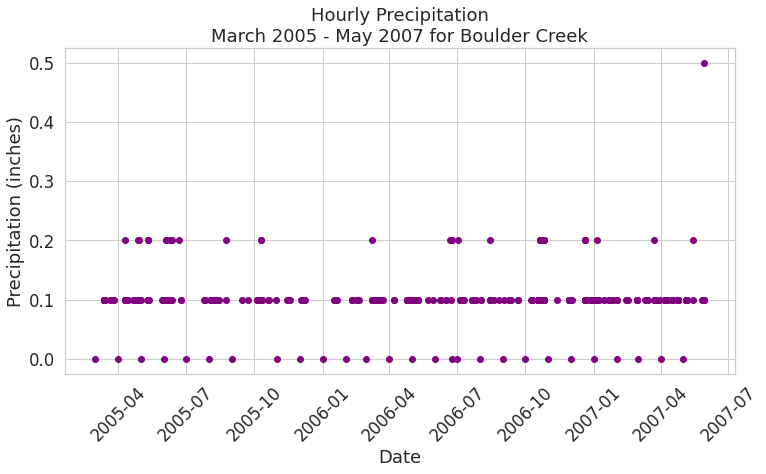

In [ ]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 6)) # (12,6) means the size of figure

# Add x-axis and y-axis
ax.scatter(precip_mar_may_0507.index.values,
       precip_mar_may_0507["HPCP"],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Hourly Precipitation\nMarch 2005 - May 2007 for Boulder Creek")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

## 3. Resample or Summarize Time Series Data in Python with Pandas - Hourly to Daily Summary

Often you need to summarize or aggregate time series data by a new time period. For instance, you may want to summarize hourly data to provide a daily, monthly, or yearly data.

**This process of changing the time period that data are summarized for is often called resampling.**

In pandas, we can use the fuction: **resample()** to achieve the goal.


<h3>3.1 Resample Hourly Data to Daily Data</h3>

To aggreate or temporal resample the data for a time period, you can take all of the values for each day and summarize them.

In this case, you want total daily rainfall, so you will use the **resample()** method together with **.sum()**.

The resample() is a method of pandas dataframes that can be used to summarize data by date or time. The .sum() method will add up all values for each resampling period (e.g., for each day) to provide a summary output value for that period.

As you have already set the DATA column as the index, pandas already knows what to use for the data index. you can use: **yourdata.resample("D").sum()** to achieve your goal.

The 'D' specifies that you want to aggregate or resample, by day.



In [ ]:
# Resample to daily precip sum and save as new dataframe
precip_2003_2013_daily = boulder_precip_2003_2013.resample('D').sum()

precip_2003_2013_daily

,ELEVATION,LATITUDE,LONGITUDE,HPCP
DATE,,,,
2003-01-01,1650.5,40.03389,-105.28111,0.0
2003-01-02,0.0,0.00000,0.00000,0.0
2003-01-03,0.0,0.00000,0.00000,0.0
2003-01-04,0.0,0.00000,0.00000,0.0
2003-01-05,0.0,0.00000,0.00000,0.0
...,...,...,...,...
2013-12-27,0.0,0.00000,0.00000,0.0
2013-12-28,0.0,0.00000,0.00000,0.0
2013-12-29,1650.5,40.03380,-105.28110,0.0


Note that you have resampled the data, each HPCP value now represents a daily total sum of all precipitation measured that day. Also notice that your DATA index no longer contains hourly time stamps, as you now have only one summary value or row per day.

Plot the aggregated dataframe for daily total precipitation and notice that the y axis has increased in range and that there is only one data point for each day, though there are still quite a lot of points.

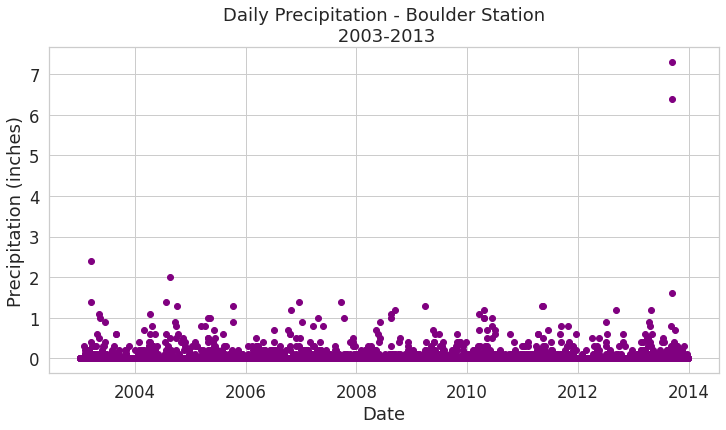

In [ ]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 6))

# Add x-axis and y-axis
ax.scatter(precip_2003_2013_daily.index.values,
           precip_2003_2013_daily['HPCP'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Precipitation - Boulder Station\n 2003-2013")

plt.show()

<h3>3.2 Resample Daily Data to Monthly Data</h3>

You can use the similar syntax to resample the daily data to monthly: yourdata.resample("M").sum().
The 'M' specifying that you want to aggregate, or resample, by month.

In [ ]:
# Resample to monthly precip sum and save as new dataframe
precip_2003_2013_monthly = precip_2003_2013_daily.resample('M').sum()

precip_2003_2013_monthly

,ELEVATION,LATITUDE,LONGITUDE,HPCP
DATE,,,,
2003-01-31,1650.5,40.03389,-105.28111,0.0
2003-02-28,26408.0,640.54224,-1684.49776,1.4
2003-03-31,74272.5,1801.52505,-4737.64995,5.2
2003-04-30,28058.5,680.57613,-1789.77887,1.6
2003-05-31,34660.5,840.71169,-2210.90331,3.3
...,...,...,...,...
2013-08-31,14854.5,360.30420,-947.52990,1.0
2013-09-30,118836.0,2882.43360,-7580.23920,17.7
2013-10-31,31359.5,760.64220,-2000.34090,2.0


Once again, notice that now you have resampled the data, each HPCP value represents a monthly total and that you have only one summary value for each month



Plot the aggregated dataframe for monthly total precipitation and notice that the y axis has again increased in range and that there is only one data point for each month.

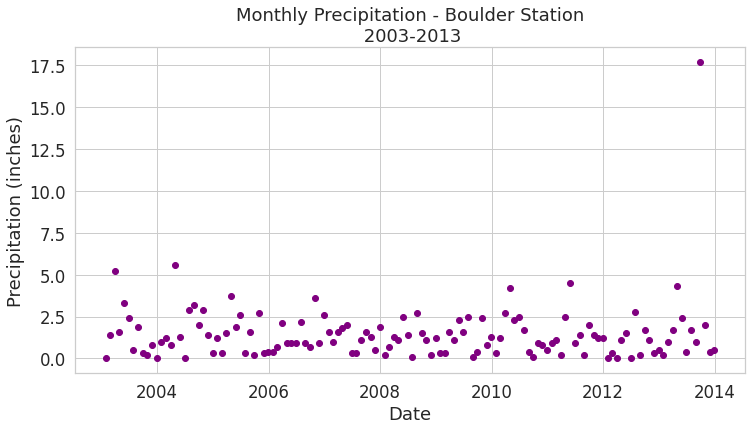

In [ ]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 6))

# Add x-axis and y-axis
ax.scatter(precip_2003_2013_monthly.index.values,
           precip_2003_2013_monthly['HPCP'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Monthly Precipitation - Boulder Station\n 2003-2013")

plt.show()

<h3>3.3 Resample Monthly Data to Yearly Data</h3>

You can use the similar syntax to resample the monthly data to yearly: yourdata.resample("Y").sum().
The 'Y' specifying that you want to aggregate, or resample, by year.

In [ ]:
# Resample to monthly precip sum and save as new dataframe
precip_2003_2013_yearly = precip_2003_2013_monthly.resample('Y').sum()

precip_2003_2013_yearly

,ELEVATION,LATITUDE,LONGITUDE,HPCP
DATE,,,,
2003-12-31,255827.5,6205.25295,-16318.57205,17.6
2004-12-31,349906.0,8487.18468,-22319.59532,22.6
2005-12-31,292138.5,7085.99853,-18634.75647,16.7
2006-12-31,278934.5,6765.72741,-17792.50759,16.8
2007-12-31,259128.5,6285.32073,-16529.13427,15.0
2008-12-31,239322.5,5804.91405,-15265.76095,14.0
2009-12-31,250876.0,6085.13949,-16002.72741,14.7
2010-12-31,272332.5,6605.57700,-17371.38150,17.6
2011-12-31,300391.0,7286.15160,-19161.16020,17.5


Once again, notice that now you have resampled the data, each HPCP value represents a yearly total and that you have only one summary value for each year. **Notice that the dates have also been updated in the dataframe as the last day of each year (e.g., 2003-12-31)**. This is important to note for the plot, in which the values will apprear along the x axis with one value at the end of each year.

Plot the aggregated dataframe for yearly total precipitation and notice that the y axis has again increased in range and that there is only one data point for each year.

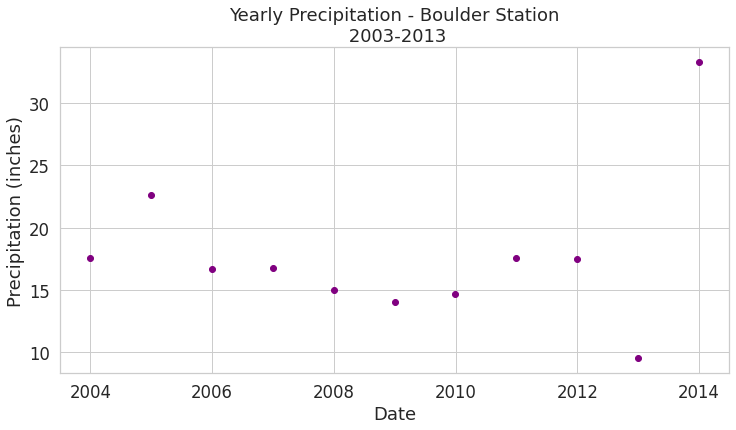

In [ ]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 6))

# Add x-axis and y-axis
ax.scatter(precip_2003_2013_yearly.index.values,
           precip_2003_2013_yearly['HPCP'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Yearly Precipitation - Boulder Station\n 2003-2013")

plt.show()

Note that you can also resample the hourly data to a yearly timestep, without first resampling the data to a daily or monthly timestep:


**precip_2003_2013_yearly = precip_2003_2013_hourly.resample('Y').sum()**



In [ ]:
# Define relative path to the data
file_path = os.path.join("colorado-flood",
                         "discharge",
                         "06730200-discharge-daily-1986-2013.csv")

print(file_path)

# Import the file as a pandas dataframe
boulder_discharge_2003_2013 = pd.read_csv(file_path)
boulder_discharge_2003_2013.head()

colorado-flood/discharge/06730200-discharge-daily-1986-2013.csv


,agency_cd,site_no,datetime,disValue,qualCode
0,USGS,6730200,10/1/86,30.0,A
1,USGS,6730200,10/2/86,30.0,A
2,USGS,6730200,10/3/86,30.0,A
3,USGS,6730200,10/4/86,30.0,A
4,USGS,6730200,10/5/86,30.0,A


In [ ]:

# Import data using datetime and no data value
boulder_discharge_1986_2013 = pd.read_csv(file_path,
                                       # Make sure the dates import in datetime format
                                       parse_dates=['datetime'],
                                       # Set DATE as the index so you can subset data by time period
                                       index_col=['datetime'])

# View the data
boulder_discharge_1986_2013.head()

,agency_cd,site_no,disValue,qualCode
datetime,,,,
1986-10-01,USGS,6730200,30.0,A
1986-10-02,USGS,6730200,30.0,A
1986-10-03,USGS,6730200,30.0,A
1986-10-04,USGS,6730200,30.0,A
1986-10-05,USGS,6730200,30.0,A


In [ ]:
boulder_discharge_1986_2013_yearly = boulder_discharge_1986_2013.resample('Y').mean()
boulder_discharge_1986_2013_yearly

,site_no,disValue
datetime,,
1986-12-31,6730200.0,49.282609
1987-12-31,6730200.0,102.035616
1988-12-31,6730200.0,89.592896
1989-12-31,6730200.0,82.709589
1990-12-31,6730200.0,93.517808
1991-12-31,6730200.0,87.750685
1992-12-31,6730200.0,84.005464
1993-12-31,6730200.0,97.010959
1994-12-31,6730200.0,100.956164


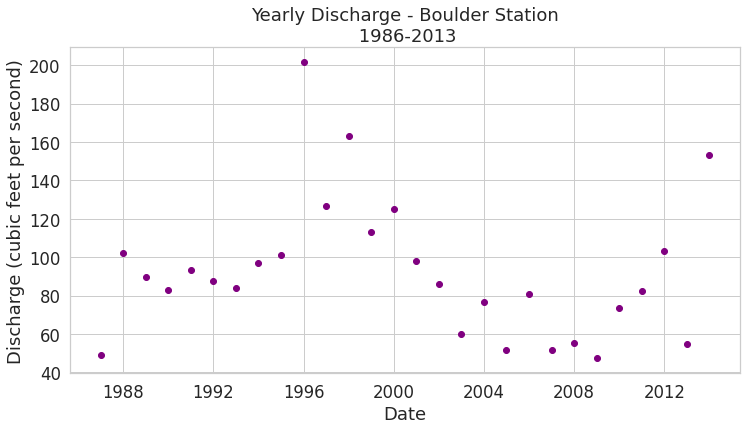

In [ ]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 6))

# Add x-axis and y-axis
ax.scatter(boulder_discharge_1986_2013_yearly.index.values,
           boulder_discharge_1986_2013_yearly['disValue'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Discharge (cubic feet per second)",
       title="Yearly Discharge - Boulder Station\n 1986-2013")

plt.show()

Reference: https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/subset-time-series-data-python/